In [1]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#File saved from datapreprocessing step
dataset = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\dataset.csv", header=0)

In [3]:
dataset.shape

(1150, 37)

In [4]:
dataset.head(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
0,MID10801,model4,21,78.42,67.50,54.00,2.08,60.0,15.83,error2,...,150.74,67.48,112.02,203.09,61.20,21.44,170.95,446.97,100.71,40.44
1,MID10802,model4,21,21.14,85.00,85.00,0.00,67.5,23.18,error3,...,152.08,67.80,111.70,228.25,64.57,20.85,170.83,446.66,100.88,40.41
2,MID10803,model1,20,33.85,41.25,41.25,50.47,75.0,13.17,error4,...,182.91,63.47,101.82,233.72,67.03,21.06,170.79,445.61,101.32,40.53
3,MID10804,model2,20,35.00,56.32,41.25,50.00,60.0,14.29,error4,...,160.83,63.99,113.31,224.22,60.01,20.28,171.14,445.53,101.64,40.59
4,MID10805,model2,20,93.47,74.19,86.64,63.75,63.0,20.62,error1,...,153.90,73.11,114.98,240.43,62.95,21.89,170.77,447.89,101.45,40.61


In [5]:
dataset.tail(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
1145,MID11996,model4,1,52.74,38.66,0.0,0.0,0.0,26.66,error2,...,169.09,63.00,102.52,234.57,65.15,22.88,170.53,447.08,100.44,40.35
1146,MID11997,model1,1,0.00,42.50,51.0,75.0,0.0,19.29,error4,...,158.61,62.65,116.41,222.48,64.26,17.66,170.65,445.15,101.18,40.27
1147,MID11998,model4,1,94.93,58.34,30.0,0.0,0.0,25.00,error1,...,154.96,65.05,118.35,247.86,55.53,21.42,171.07,447.19,101.00,40.30
1148,MID11999,model2,1,19.64,0.00,0.0,75.0,0.0,42.86,error4,...,156.40,60.91,104.93,208.42,61.06,22.86,171.28,448.07,101.37,40.37
1149,MID12000,model3,1,37.50,57.00,57.0,0.0,0.0,20.36,error3,...,152.35,71.02,116.55,219.89,60.95,20.52,171.31,444.46,100.93,40.24


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 37 columns):
MachineID                      1150 non-null object
MachineModel                   1150 non-null object
ServicePeriod                  1150 non-null int64
error1_avg                     1150 non-null float64
error2_avg                     1150 non-null float64
error3_avg                     1150 non-null float64
error4_avg                     1150 non-null float64
error5_avg                     1150 non-null float64
Comp_Timelapse_diff_errors     1150 non-null float64
RecentError                    1150 non-null object
MostOccuredError               1150 non-null object
comp_1_replace_avg             1150 non-null float64
comp_2_replace_avg             1150 non-null float64
comp_3_replace_avg             1150 non-null float64
comp_4_replace_avg             1150 non-null float64
Comp_Timelapse_diff_replace    1150 non-null float64
RecentReplacedComp             1150 non-null object

### Filtering Train and Test rows from the final dataset

In [7]:
train_target = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\data\\phd_data\\train.csv", header=0)

In [8]:
train_target.head(5)

,MachineID,ActionPoint
0,MID11001,ComponentRepair
1,MID11002,ComponentRepair
2,MID11003,NoIssue
3,MID11004,NoIssue
4,MID11005,ComponentRepair


In [9]:
list_of_train_id = train_target.MachineID
list_of_train_labels = train_target.ActionPoint
print("the number of train rows are {}".format(len(list_of_train_id)))
print("the number of train labels are {}".format(len(list_of_train_labels)))

the number of train rows are 674
the number of train labels are 674


In [10]:
#train = dataset[dataset['MachineID'] isin list_of_train_id]
train_dataset = dataset[dataset['MachineID'].isin(list_of_train_id)]

In [11]:
##create a dictionary of Machine ID and the target variable ActionPoint
train_target_dict = { k:v for (k,v) in zip(train_target['MachineID'], train_target['ActionPoint'])}   
train_dataset['ActionPoint'] = [train_target_dict.get(i) for i in train_dataset['MachineID']]

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
train_dataset.shape

(674, 38)

In [13]:
train_dataset.head(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
150,MID11001,model4,21,60.00,35.65,40.71,0.0,65.00,13.58,error2,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
151,MID11002,model1,21,0.00,150.00,150.00,95.0,95.00,31.50,error5,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
152,MID11003,model3,22,37.50,90.00,93.54,0.0,85.00,27.27,error3,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
153,MID11004,model4,22,42.41,78.75,78.75,0.0,52.50,18.53,error2,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
154,MID11005,model3,22,44.21,96.44,33.24,0.0,56.25,19.02,error2,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair


In [14]:
train_dataset.to_csv("my_train.csv", index=False)

### Filtering Test data from main dataset

In [15]:
test_target = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\data\\phd_data\\Test.csv", header=0)

In [16]:
list_of_test_id = test_target.MachineID
print("the number of train rows are {}".format(len(list_of_test_id)))
#print("the number of train labels are {}".format(len(list_of_train_labels)))

the number of train rows are 326


In [17]:
#train = dataset[dataset['MachineID'] isin list_of_train_id]
test_dataset = dataset[dataset['MachineID'].isin(list_of_test_id)]

In [18]:
test_dataset.head(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
155,MID11006,model3,21,45.0,20.0,20.0,0.0,50.00,19.00,error1,...,156.43,65.47,113.24,198.63,61.67,21.63,170.78,446.93,100.87,40.55
156,MID11007,model2,21,30.0,25.9,0.0,60.0,40.00,17.14,error5,...,158.08,64.81,117.10,235.26,57.40,21.46,170.26,446.78,101.52,40.64
188,MID11039,model3,22,45.0,60.0,60.0,0.0,75.00,23.08,error1,...,152.31,69.27,118.99,217.51,64.54,21.08,170.94,446.35,100.87,40.57
194,MID11045,model4,21,30.0,25.0,25.0,0.0,62.26,16.98,error5,...,163.95,64.18,115.16,218.24,55.81,20.89,171.17,447.03,100.84,40.36
198,MID11049,model4,21,0.0,0.0,0.0,38.6,67.50,33.75,error5,...,146.07,64.56,102.39,205.97,66.63,21.34,170.73,446.50,100.61,40.52


In [19]:
test_dataset.to_csv("my_test.csv", index=False)

### Visualizations

In [36]:
train_dataset.head()

,MachineID,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
150,MID11001,21,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
151,MID11002,21,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
152,MID11003,22,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
153,MID11004,22,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
154,MID11005,22,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair


In [37]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 150 to 999
Data columns (total 31 columns):
MachineID                      674 non-null object
ServicePeriod                  674 non-null int64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
comp1_repair_avg               674 non-null float64
comp2_repair_avg               674 non-null float64
comp3_repair_avg               674 non-null float64
comp4_repair_avg               674 non-null float64
Comp_Timelap

In [38]:
columns = train_dataset.columns
categorical_cols = ['ActionPoint', 'MachineID']
numerical_cols =list(set(columns) - set(categorical_cols))
print(categorical_cols)
print(len(categorical_cols))
print(len(columns))
print(len(numerical_cols))
print(numerical_cols)

['ActionPoint', 'MachineID']
2
31
29
['error2_avg', 'Sensor4_mean', 'Sensor2_max', 'Sensor3_min', 'error4_avg', 'comp_2_replace_avg', 'Sensor4_min', 'error1_avg', 'Sensor2_min', 'Comp_Timelapse_diff_errors', 'Sensor4_max', 'comp_3_replace_avg', 'comp4_repair_avg', 'error5_avg', 'comp_1_replace_avg', 'comp_4_replace_avg', 'comp1_repair_avg', 'comp3_repair_avg', 'Sensor1_min', 'ServicePeriod', 'comp2_repair_avg', 'Sensor3_max', 'Sensor3_mean', 'Comp_Timelapse_diff_repair', 'error3_avg', 'Comp_Timelapse_diff_replace', 'Sensor2_mean', 'Sensor1_max', 'Sensor1_mean']


In [39]:
train_dataset[categorical_cols] = train_dataset[categorical_cols].apply(lambda x: x.astype('category'))
train_dataset.dtypes

C:\Users\chait\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


MachineID                      category
ServicePeriod                     int64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
comp_4_replace_avg              float64
Comp_Timelapse_diff_replace     float64
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
Sensor1_max                     float64
Sensor2_max                     float64
Sensor3_max                     float64
Sensor4_max                     float64
Sensor1_min                     float64
Sensor2_min                     float64
Sensor3_min                     float64


In [40]:
train_dataset.isnull().sum(axis=0)

MachineID                      0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
comp_4_replace_avg             0
Comp_Timelapse_diff_replace    0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_min                    0
Sensor4_min                    0
Sensor1_mean                   0
Sensor2_mean                   0
Sensor3_mean                   0
Sensor4_mean                   0
ActionPoin

### Preparing all dataframes for visualization

In [42]:
complaintsLog = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\data\\phd_data\\ComplaintsLog.csv", header=0)

In [43]:
train_complaintsLog = complaintsLog[complaintsLog['MachineID'].isin(list_of_train_id)]

In [44]:
train_complaintsLog['ActionPoint'] = [train_target_dict.get(i) for i in train_complaintsLog['MachineID']]

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
train_complaintsLog.head(5)

,Comp_Log_Year,Comp_Log_Month,Comp_Log_Day,Comp_Log_Time,MachineID,Comp_Log_ErrorID,ActionPoint
1655,2017,1,6,3:00:00,MID11087,error3,ComponentRepair
1656,2017,2,3,6:00:00,MID11087,error4,ComponentRepair
1657,2017,2,21,11:00:00,MID11087,error1,ComponentRepair
1658,2017,2,21,16:00:00,MID11087,error2,ComponentRepair
1659,2017,3,20,6:00:00,MID11087,error1,ComponentRepair


#### Components Service log

In [47]:
componentsServiceLog = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\data\\phd_data\\ComponentServiceLog.csv", header=0)

In [48]:
train_componentsServiceLog = componentsServiceLog[componentsServiceLog['MachineID'].isin(list_of_train_id)]

In [49]:
train_componentsServiceLog['ActionPoint'] = [train_target_dict.get(i) for i in train_componentsServiceLog['MachineID']]

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
train_componentsServiceLog.head(5)

,Comp_Service_Year,Comp_Service_Month,Comp_Service_Day,Comp_Service_Time,MachineID,Comp_Service_ComponentAttended,Comp_Service_ServiceType,ActionPoint
4457,2016,7,1,6:00:00,MID11087,Component4,ScheduledService,ComponentRepair
4458,2016,9,14,6:00:00,MID11087,Component1,ComponentRepair,ComponentRepair
4459,2016,9,14,6:00:00,MID11087,Component2,ComponentRepair,ComponentRepair
4460,2016,11,13,6:00:00,MID11087,Component3,ComponentRepair,ComponentRepair
4461,2017,1,5,6:00:00,MID11087,Component1,ComponentRepair,ComponentRepair


#### Component Replacement log

In [51]:
componentsReplacementLog = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\data\\phd_data\\ComponentReplacementLog.csv", header=0)

In [52]:
train_componentReplacementLog = componentsReplacementLog[componentsReplacementLog['MachineID'].isin(list_of_train_id)]

In [53]:
train_componentReplacementLog['ActionPoint'] = [train_target_dict.get(i) for i in train_componentReplacementLog['MachineID']]

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
train_componentReplacementLog.head(5)

,Comp_Replace_Year,Comp_Replace_Month,Comp_Replace_Day,Comp_Replace_Time,MachineID,Comp_Replace_ComponentReplacement,ActionPoint
906,2017,2,4,6:00:00,MID11087,Component3,ComponentRepair
907,2017,3,21,6:00:00,MID11087,Component1,ComponentRepair
908,2017,4,5,6:00:00,MID11087,Component4,ComponentRepair
909,2017,5,5,6:00:00,MID11087,Component3,ComponentRepair
910,2017,5,20,6:00:00,MID11087,Component2,ComponentRepair


#### Operations Dataframe

In [55]:
operatingConditions = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\data\\phd_data\\OperatingConditionsData.csv", header=0)

In [56]:
train_operatingConditions = operatingConditions[operatingConditions['MachineID'].isin(list_of_train_id)]

In [57]:
train_operatingConditions['ActionPoint'] = [train_target_dict.get(i) for i in train_operatingConditions['MachineID']]

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
train_operatingConditions.head(5)

,Year,Month,Day,Time,MachineID,Sensor1,Sensor2,Sensor3,Sensor4,ActionPoint
1201500,2017,1,1,06:00:00,MID11087,151.9200,530.8136,101.7882,49.60401,ComponentRepair
1201501,2017,1,1,07:00:00,MID11087,174.5220,535.5235,113.2560,41.51591,ComponentRepair
1201502,2017,1,1,08:00:00,MID11087,146.9128,456.0807,107.7870,42.09969,ComponentRepair
1201503,2017,1,1,09:00:00,MID11087,179.5306,503.4700,108.2838,37.84773,ComponentRepair
1201504,2017,1,1,10:00:00,MID11087,180.5443,371.6006,107.5533,41.46788,ComponentRepair


#### Plots on Operating Condition dataset

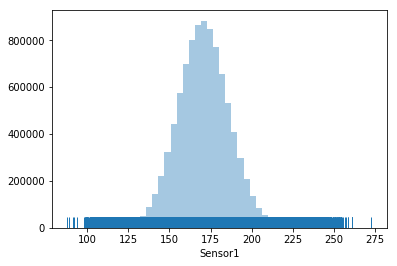

In [59]:
distplot = sns.distplot(train_operatingConditions.Sensor1, kde=False, rug=True, ) #bins=20
plt.show()

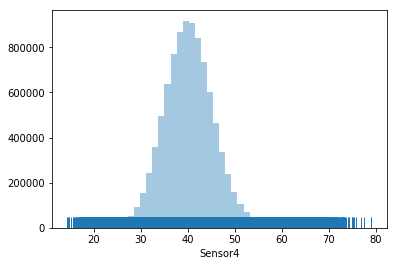

In [60]:
distplot = sns.distplot(train_operatingConditions.Sensor4, kde=False, rug=True, ) #bins=20
plt.show()

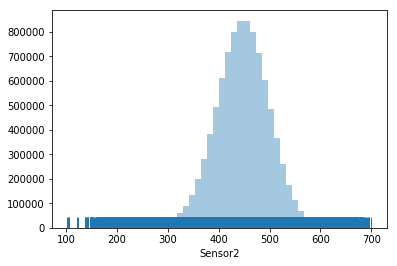

In [61]:
distplot = sns.distplot(train_operatingConditions.Sensor2, kde=False, rug=True, ) #bins=20
plt.show()

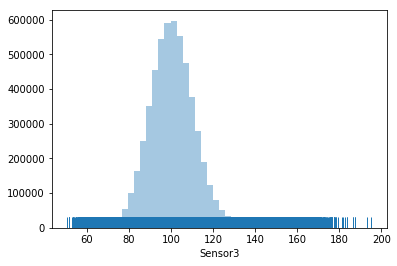

In [72]:
distplot = sns.distplot(train_operatingConditions.Sensor3, kde=False, rug=True, ) #bins=20
plt.show()

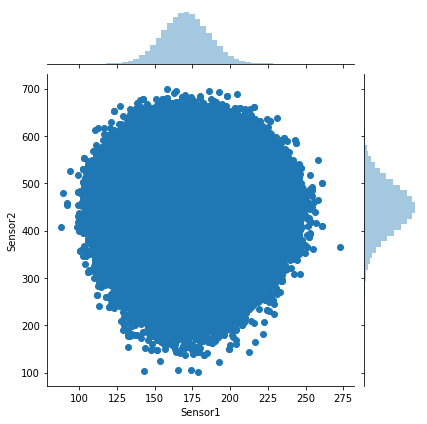

In [66]:
sns.jointplot(x="Sensor1", y="Sensor2", data=train_operatingConditions);

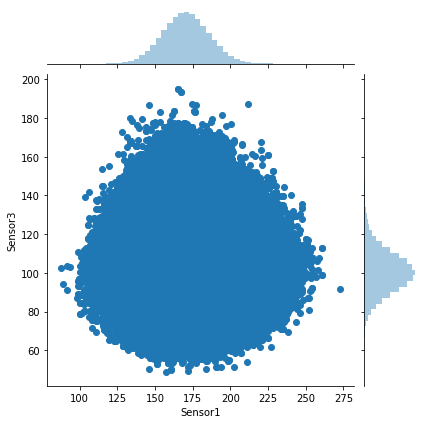

In [67]:
sns.jointplot(x="Sensor1", y="Sensor3", data=train_operatingConditions);

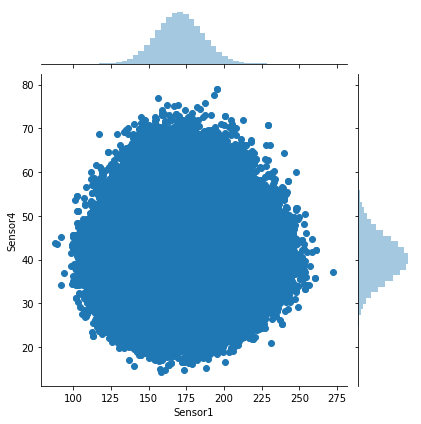

In [68]:
sns.jointplot(x="Sensor1", y="Sensor4", data=train_operatingConditions);

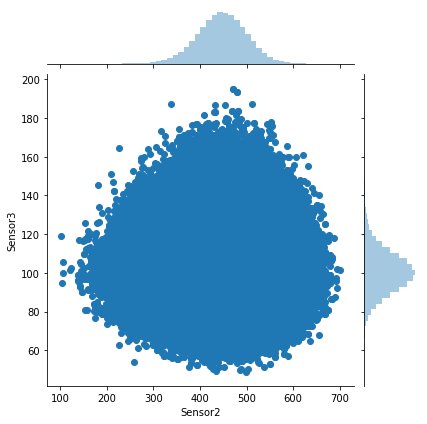

In [69]:
sns.jointplot(x="Sensor2", y="Sensor3", data=train_operatingConditions);

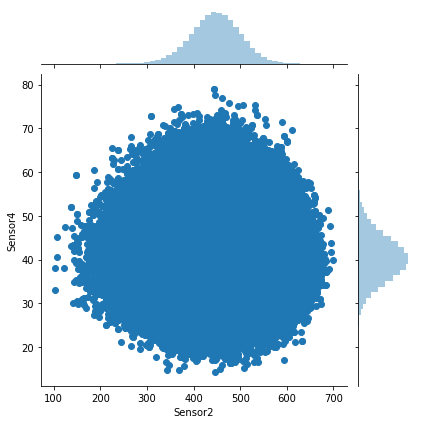

In [70]:
sns.jointplot(x="Sensor2", y="Sensor4", data=train_operatingConditions);

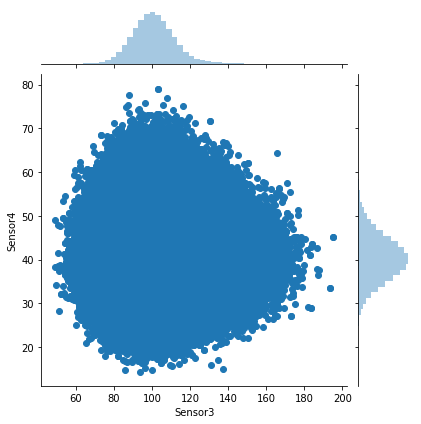

In [71]:
sns.jointplot(x="Sensor3", y="Sensor4", data=train_operatingConditions);

#### Component Replacement

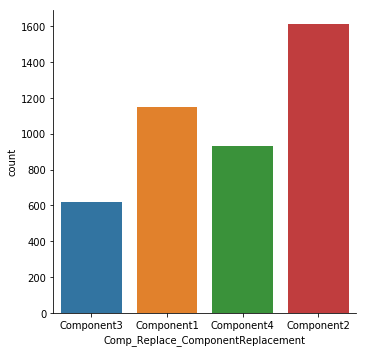

In [73]:
sns.catplot(x="Comp_Replace_ComponentReplacement", kind="count", data=train_componentReplacementLog);

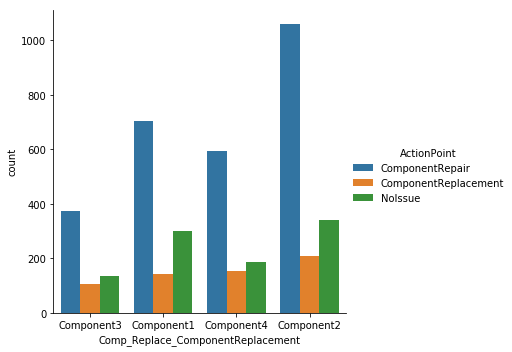

In [74]:
sns.catplot(x="Comp_Replace_ComponentReplacement", kind="count", hue="ActionPoint", data=train_componentReplacementLog);

### Component Service Log

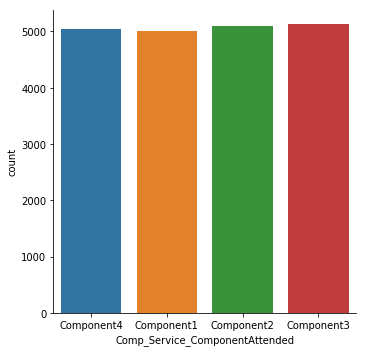

In [75]:
sns.catplot(x="Comp_Service_ComponentAttended", kind="count", data=train_componentsServiceLog);

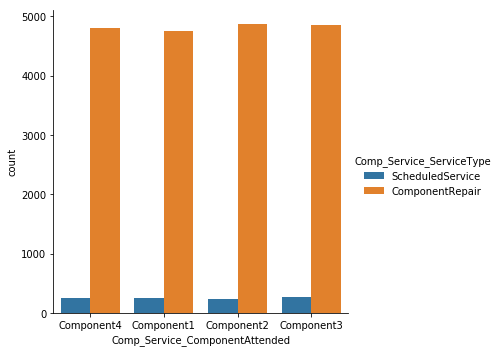

In [77]:
sns.catplot(x="Comp_Service_ComponentAttended", kind="count", hue="Comp_Service_ServiceType",data=train_componentsServiceLog);

#### Complaints Log Data

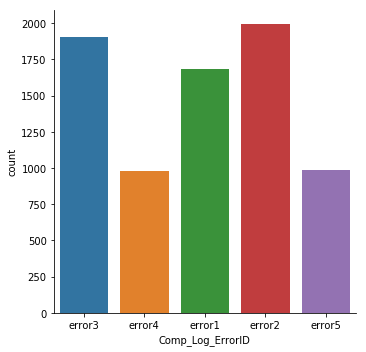

In [78]:
sns.catplot(x="Comp_Log_ErrorID", kind="count",data=train_complaintsLog);

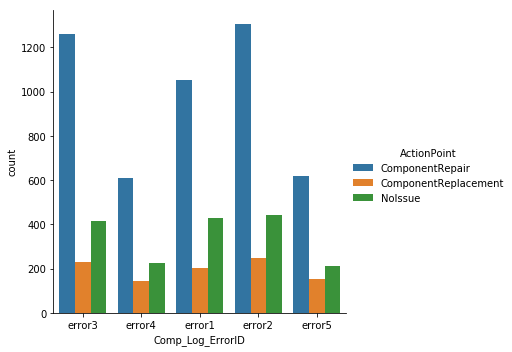

In [81]:
sns.catplot(x="Comp_Log_ErrorID", kind="count",hue='ActionPoint', data=train_complaintsLog);

### Feature Engineering plots

In [82]:
train_dataset.head(6)

,MachineID,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
150,MID11001,21,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
151,MID11002,21,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
152,MID11003,22,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
153,MID11004,22,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
154,MID11005,22,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair
157,MID11008,21,41.25,19.81,7.57,98.9,40.00,14.13,82.5,0.0,...,63.13,113.49,203.75,65.70,18.05,170.76,446.77,100.47,40.44,ComponentRepair


In [91]:
train_dataset.columns

Index(['MachineID', 'ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg',
       'error4_avg', 'error5_avg', 'Comp_Timelapse_diff_errors',
       'comp_1_replace_avg', 'comp_2_replace_avg', 'comp_3_replace_avg',
       'comp_4_replace_avg', 'Comp_Timelapse_diff_replace', 'comp1_repair_avg',
       'comp2_repair_avg', 'comp3_repair_avg', 'comp4_repair_avg',
       'Comp_Timelapse_diff_repair', 'Sensor1_max', 'Sensor2_max',
       'Sensor3_max', 'Sensor4_max', 'Sensor1_min', 'Sensor2_min',
       'Sensor3_min', 'Sensor4_min', 'Sensor1_mean', 'Sensor2_mean',
       'Sensor3_mean', 'Sensor4_mean', 'ActionPoint'],
      dtype='object')

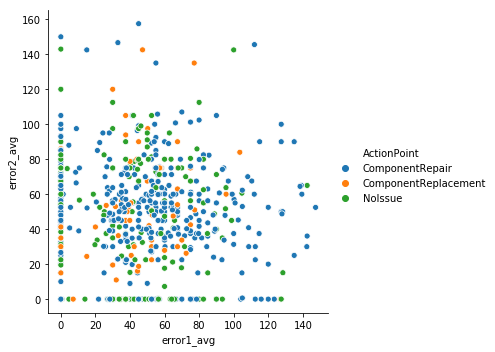

In [101]:
sns.relplot(x="error1_avg", y="error2_avg", hue="ActionPoint", data=train_dataset);

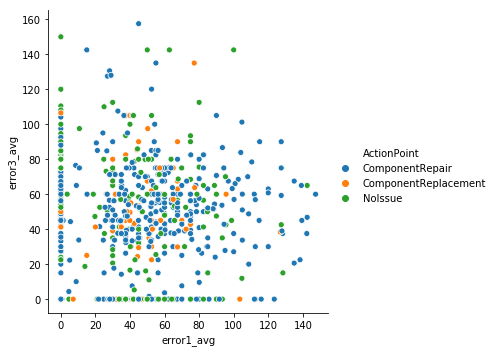

In [102]:
sns.relplot(x="error1_avg", y="error3_avg", hue="ActionPoint", data=train_dataset);

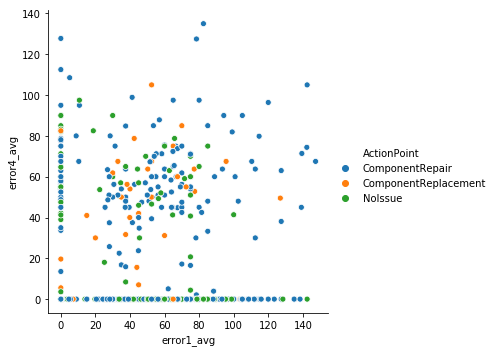

In [103]:
sns.relplot(x="error1_avg", y="error4_avg", hue="ActionPoint", data=train_dataset);

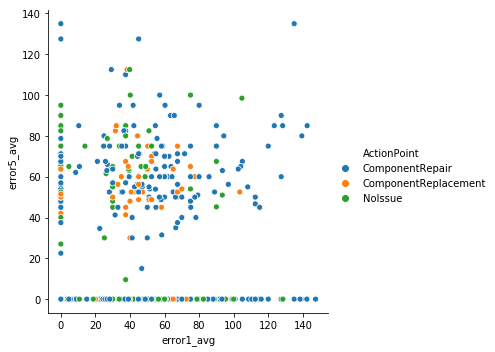

In [104]:
sns.relplot(x="error1_avg", y="error5_avg", hue="ActionPoint", data=train_dataset);

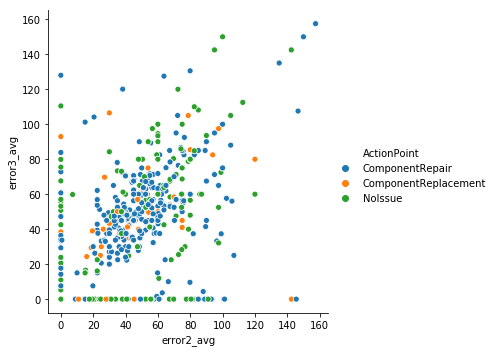

In [105]:
sns.relplot(x="error2_avg", y="error3_avg", hue="ActionPoint", data=train_dataset);

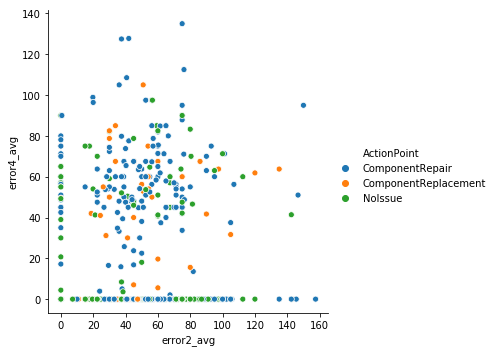

In [106]:
sns.relplot(x="error2_avg", y="error4_avg", hue="ActionPoint", data=train_dataset);

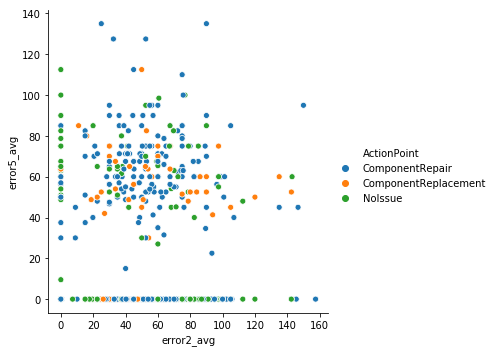

In [107]:
sns.relplot(x="error2_avg", y="error5_avg", hue="ActionPoint", data=train_dataset);

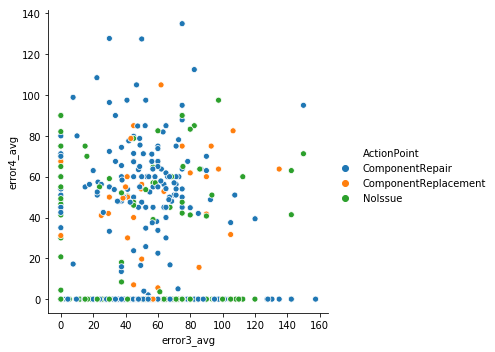

In [108]:
sns.relplot(x="error3_avg", y="error4_avg", hue="ActionPoint", data=train_dataset);

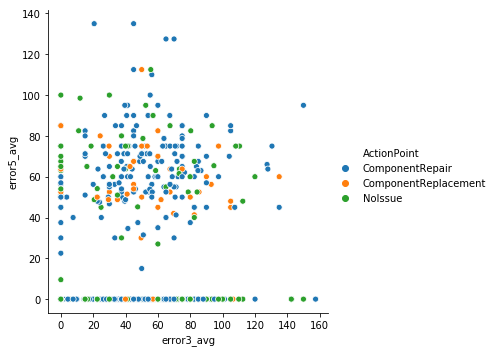

In [109]:
sns.relplot(x="error3_avg", y="error5_avg", hue="ActionPoint", data=train_dataset);

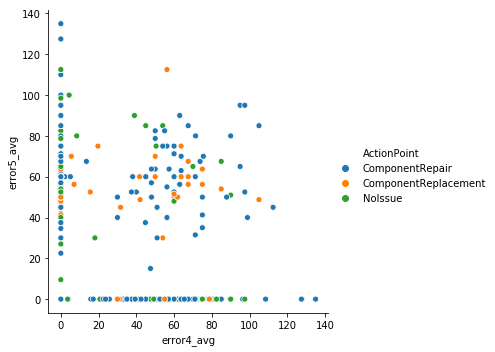

In [110]:
sns.relplot(x="error4_avg", y="error5_avg", hue="ActionPoint", data=train_dataset);

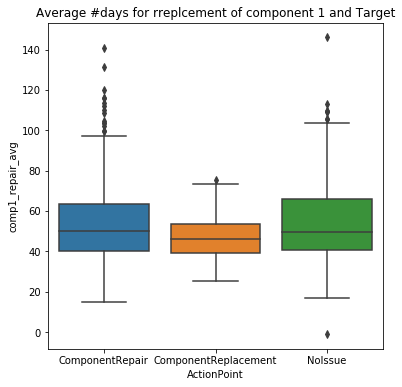

In [124]:
## check the outliers of the tenure variable
plt.figure(figsize = (6,6))
sns.boxplot(train_dataset['ActionPoint'],train_dataset['comp1_repair_avg'])
plt.title('Average #days for rreplcement of component 1 and Target')
plt.show()

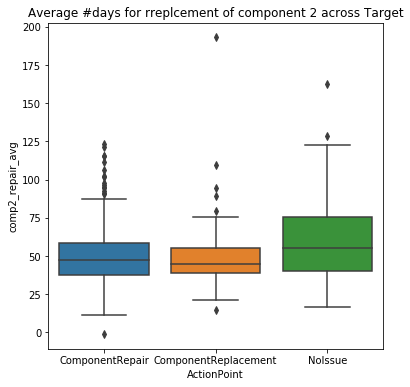

In [126]:
plt.figure(figsize = (6,6))
sns.boxplot(train_dataset['ActionPoint'],train_dataset['comp2_repair_avg'])
plt.title('Average #days for rreplcement of component 2 across Target')
plt.show()

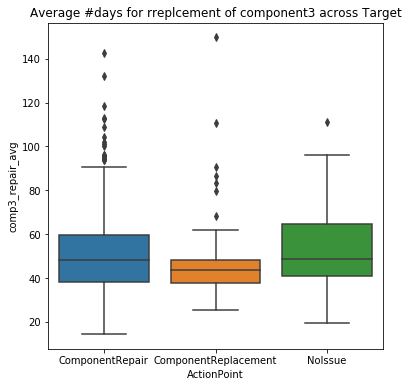

In [127]:
plt.figure(figsize = (6,6))
sns.boxplot(train_dataset['ActionPoint'],train_dataset['comp3_repair_avg'])
plt.title('Average #days for rreplcement of component3 across Target')
plt.show()

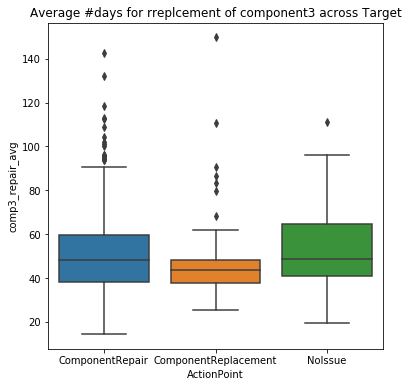

In [128]:
plt.figure(figsize = (6,6))
sns.boxplot(train_dataset['ActionPoint'],train_dataset['comp3_repair_avg'])
plt.title('Average #days for rreplcement of component3 across Target')
plt.show()

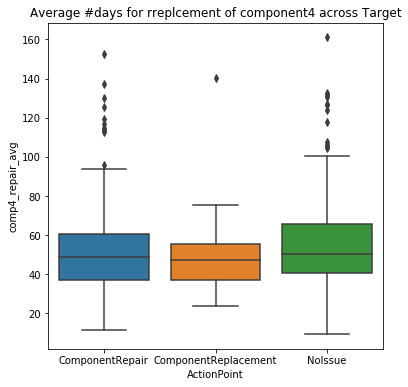

In [129]:
plt.figure(figsize = (6,6))
sns.boxplot(train_dataset['ActionPoint'],train_dataset['comp4_repair_avg'])
plt.title('Average #days for rreplcement of component4 across Target')
plt.show()

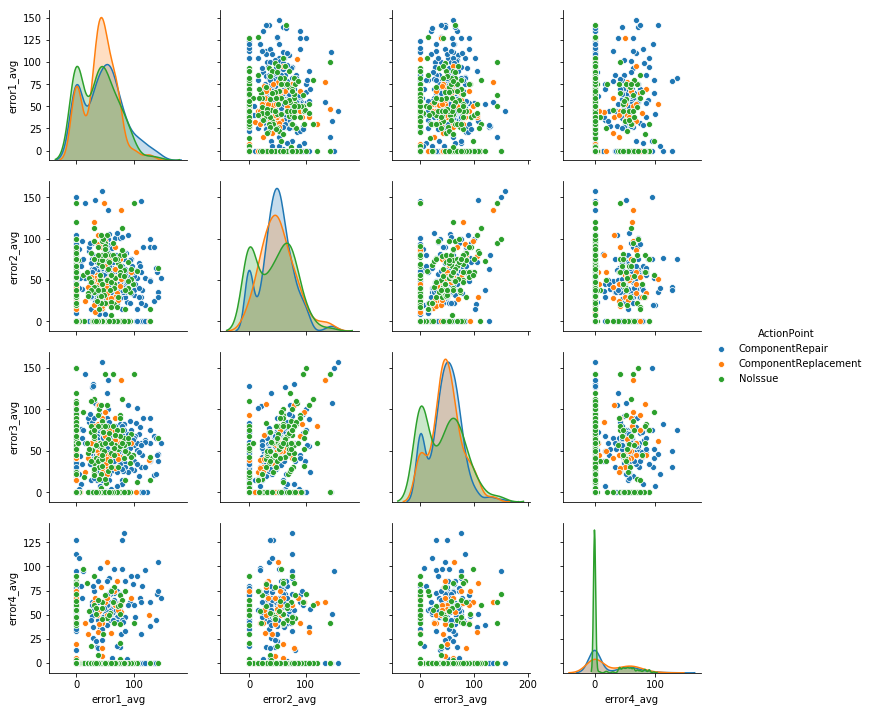

In [156]:
s1 = train_dataset[['error1_avg', 'error2_avg', 'error3_avg', 'error4_avg', 'ActionPoint']]
sns.pairplot(s1, hue='ActionPoint')

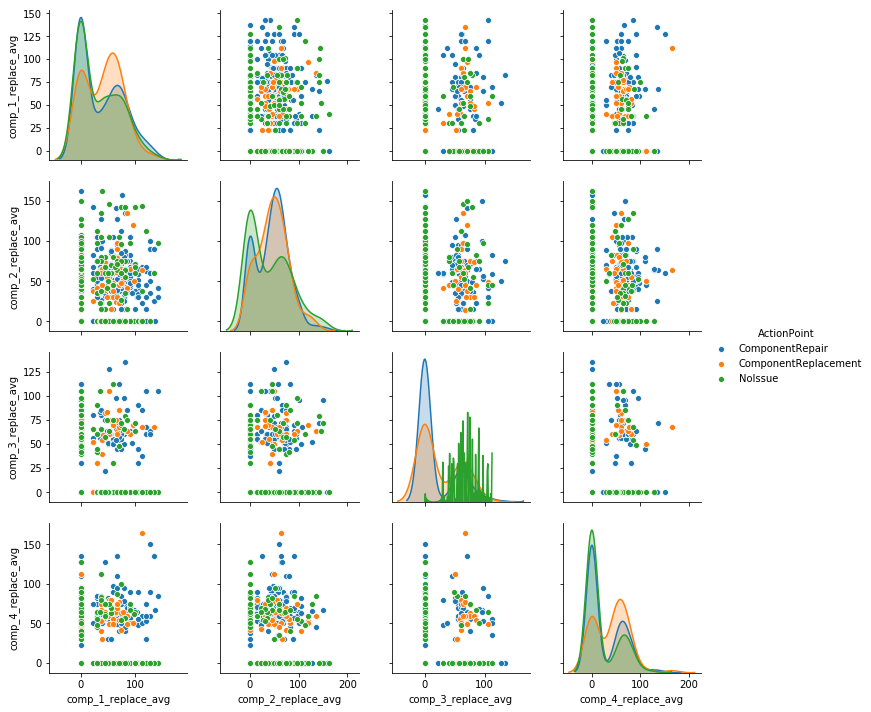

In [158]:
s1 = train_dataset[['comp_1_replace_avg', 'comp_2_replace_avg', 'comp_3_replace_avg','comp_4_replace_avg', 'ActionPoint']]
sns.pairplot(s1, hue='ActionPoint')

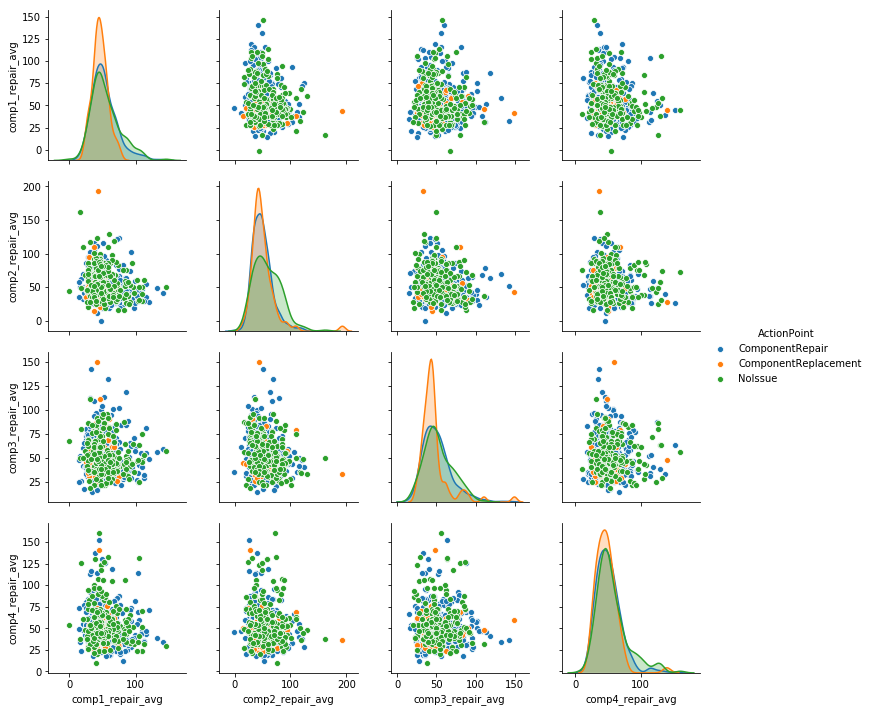

In [159]:
s1 = train_dataset[['comp1_repair_avg','comp2_repair_avg', 'comp3_repair_avg', 'comp4_repair_avg', 'ActionPoint']]
sns.pairplot(s1, hue='ActionPoint')

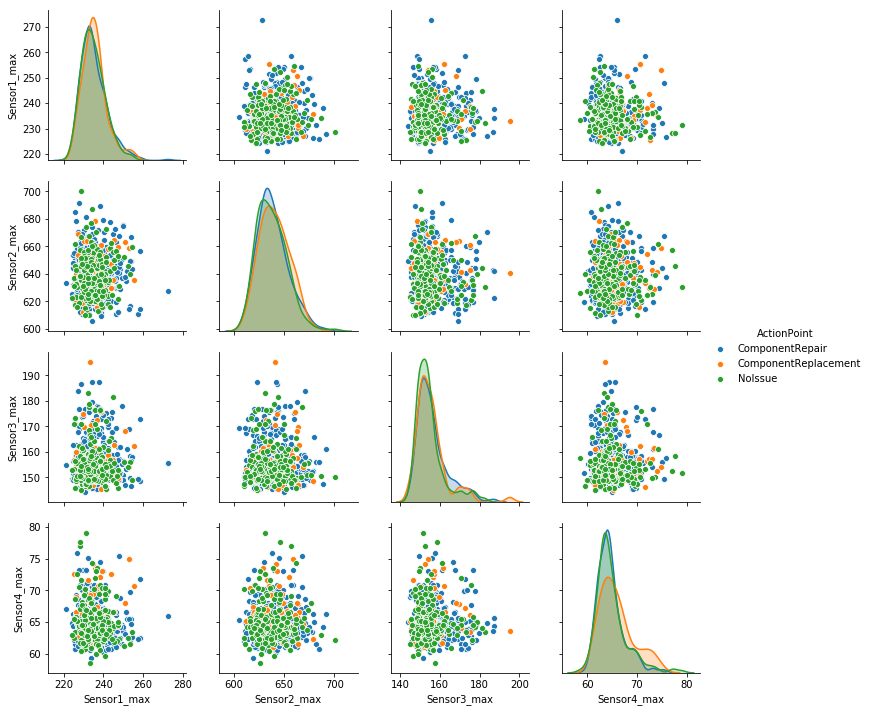

In [160]:
s1 = train_dataset[['Sensor1_max', 'Sensor2_max','Sensor3_max', 'Sensor4_max', 'ActionPoint']]
sns.pairplot(s1, hue='ActionPoint')

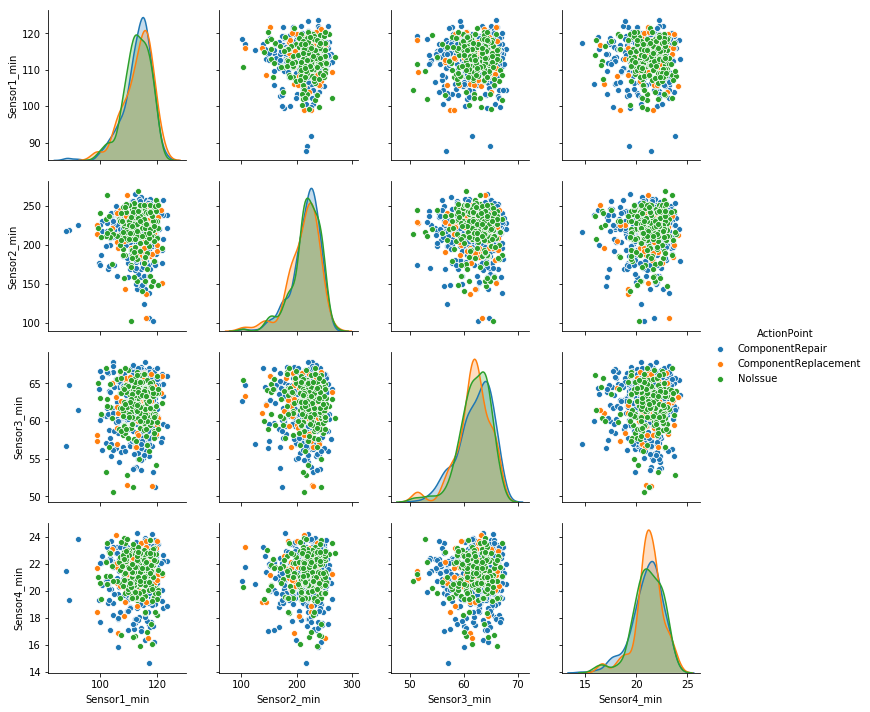

In [161]:
s1 = train_dataset[['Sensor1_min', 'Sensor2_min','Sensor3_min', 'Sensor4_min', 'ActionPoint']]
sns.pairplot(s1, hue='ActionPoint')

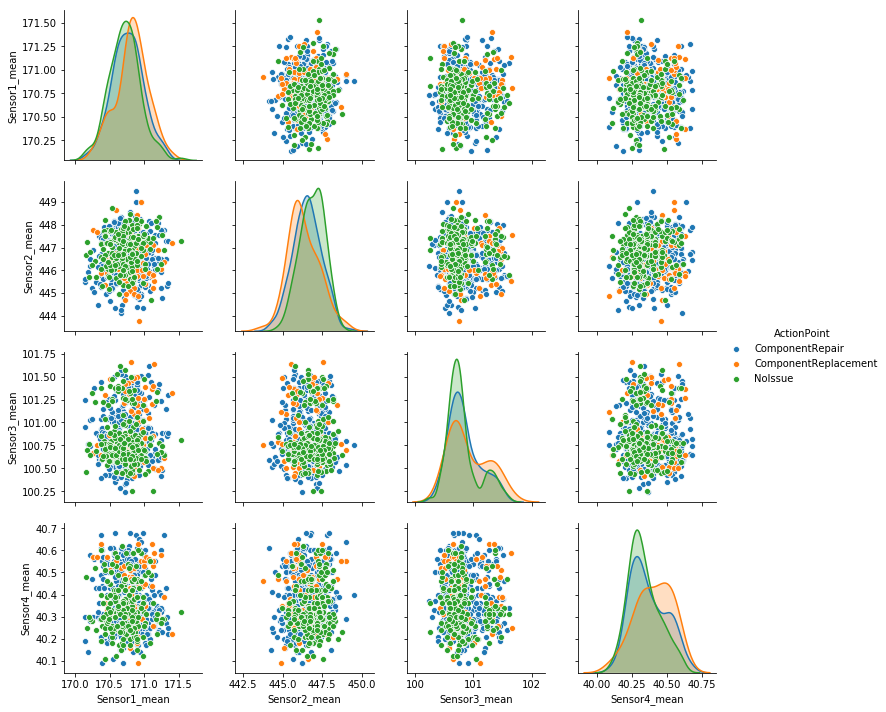

In [162]:
s1 = train_dataset[['Sensor1_mean', 'Sensor2_mean','Sensor3_mean', 'Sensor4_mean', 'ActionPoint']]
sns.pairplot(s1, hue='ActionPoint')

### Automatic Feature Selector

In [143]:
## https://github.com/WillKoehrsen/feature-selector
dataset = train_dataset.drop(columns='ActionPoint')
dataset.head(4)

,MachineID,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
150,MID11001,21,60.00,35.65,40.71,0.0,65.0,13.58,60.0,47.5,...,153.42,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33
151,MID11002,21,0.00,150.00,150.00,95.0,95.0,31.50,0.0,150.0,...,161.06,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49
152,MID11003,22,37.50,90.00,93.54,0.0,85.0,27.27,37.5,135.0,...,151.98,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54
153,MID11004,22,42.41,78.75,78.75,0.0,52.5,18.53,0.0,105.0,...,148.44,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59


In [139]:
fs = FeatureSelector(data=dataset, labels=train_labels)

In [ ]:
### Collinearity

In [151]:
fs.identify_collinear(correlation_threshold=0.8)

2 features with a correlation magnitude greater than 0.80.



In [152]:
collinear_features = fs.ops['collinear']
collinear_features[:10]

['comp_3_replace_avg', 'comp_4_replace_avg']

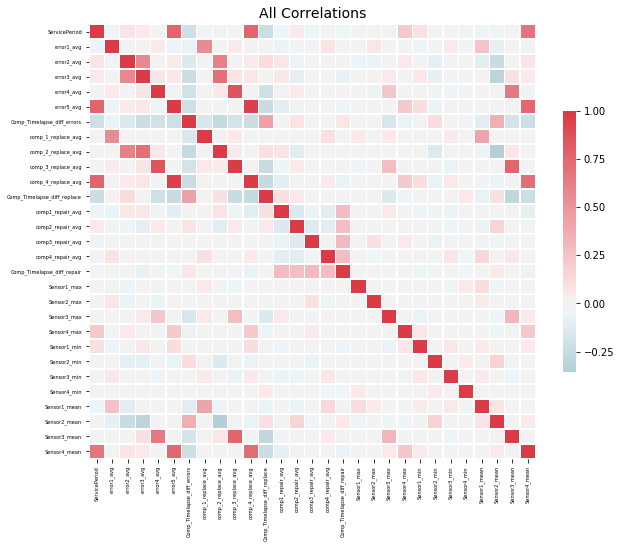

In [153]:
fs.plot_collinear(plot_all=True)